<a href="https://colab.research.google.com/github/madanjha/PythonDS/blob/main/25_01_2025_PCA_Handson_by_Tanmay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA Handson**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For the in-built dataset
from sklearn.datasets import load_digits
dataset=load_digits()

In [ ]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
dataset["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
dataset["feature_names"]


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [ ]:
dataset["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
df=pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
len(dataset["target"])

1797

In [ ]:
dataset["data"][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

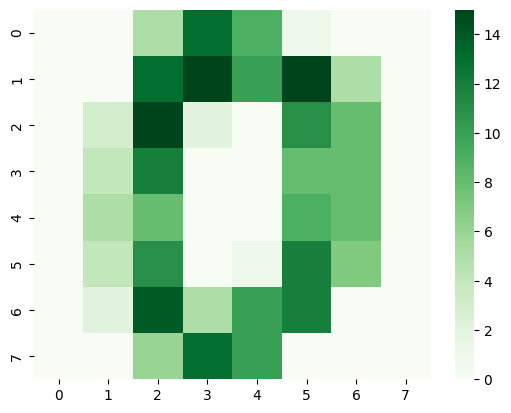

In [ ]:
sns.heatmap(dataset["data"][0].reshape(8,8),cmap="Greens")
plt.show()

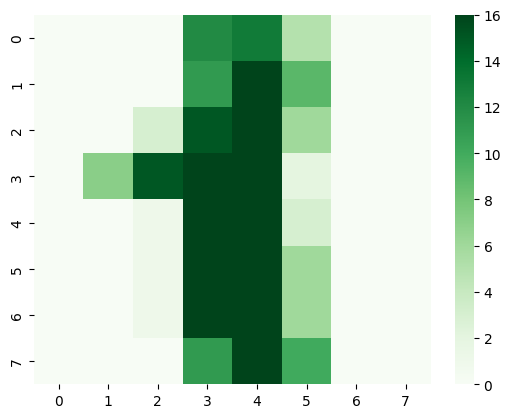

In [ ]:
sns.heatmap(dataset["data"][1].reshape(8,8),cmap="Greens")
plt.show()

In [ ]:
dataset["target"]

array([0, 1, 2, ..., 8, 9, 8])

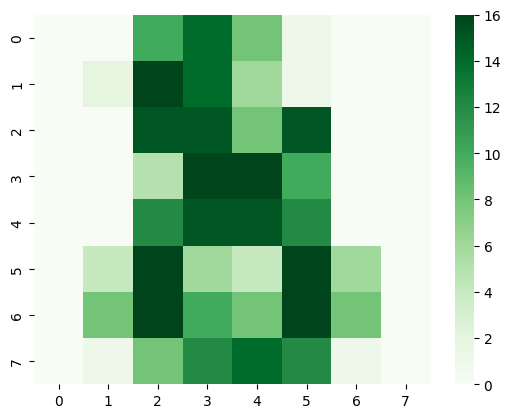

In [ ]:
sns.heatmap(dataset["data"][-1].reshape(8,8),cmap="Greens")
plt.show()

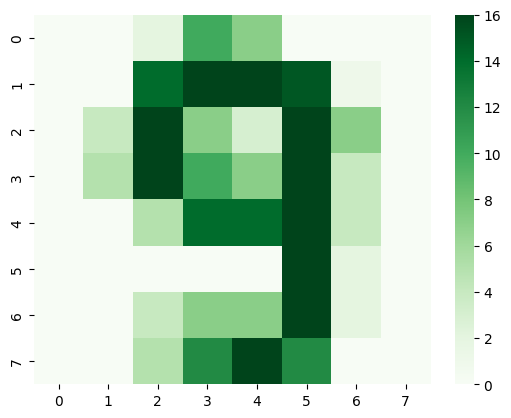

In [ ]:
sns.heatmap(dataset["data"][-2].reshape(8,8),cmap="Greens")
plt.show()

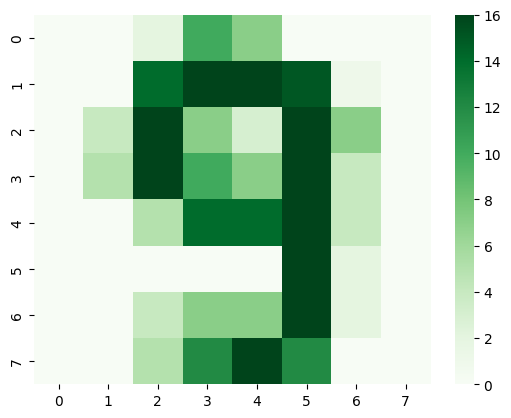

In [ ]:
sns.heatmap(dataset["data"][-2].reshape(8,8),cmap="Greens")
plt.show()

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
df.isnull().sum()

,0
pixel_0_0,0
pixel_0_1,0
pixel_0_2,0
pixel_0_3,0
pixel_0_4,0
...,...
pixel_7_3,0
pixel_7_4,0
pixel_7_5,0
pixel_7_6,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Splitting the data into Independent and Dependent
X=df
y=dataset['target']

Since We have large Number of columns in the dataset thus we need to apply any Dimensionality Reduction Technique to Overcome the problem of Overfitting

In [ ]:
# Feature Selection / Feature Extraction
# VIF, RFE,etc    (these techniques will be comple with such large number of columns also high chances of loosing information)

# We will go with Feature Extraction to overcome this

In [ ]:
# # To find the optimal value of n_component
# Step 1 : standardize the data
# Step 2 : Find covariance matrix
# Step 3 : Find the Eigen Values and Vectors from Cov matrix
# Step 4 : Find the Explained variance ratio
# Step 5 : Create a Skree Plot between the number of components and Explained variance ratio

In [ ]:
# Step 1 : standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Scaled_X=sc.fit_transform(X)

In [ ]:
Scaled_X=pd.DataFrame(Scaled_X,columns=X.columns)
Scaled_X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [ ]:
Scaled_X.T

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
pixel_0_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pixel_0_1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
pixel_0_2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
pixel_0_3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
pixel_0_4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
pixel_7_4,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
pixel_7_5,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
pixel_7_6,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


In [ ]:
# Step 2 : Find covariance matrix
cov_mat=np.cov(Scaled_X.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [ ]:
cov_mat.shape

(64, 64)

In [ ]:
# Step 3 : Find the Eigen Values and Vectors from Cov matrix
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [ ]:
eig_val

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [ ]:
# Step 4 : Find the Explained variance ratio
(7.34477606/sum(eig_val))*100

12.033916093087718

In [ ]:
total = sum(eig_val)
var_exp = [(i/total)*100 for i in sorted(eig_val, reverse=True)] # Individual explained variance
var_exp

[12.033916097734904,
 9.561054403097883,
 8.444414892624566,
 6.498407907524167,
 4.860154875966403,
 4.214119869271944,
 3.9420828035674003,
 3.3893809246383264,
 2.998221011625232,
 2.9320025512522068,
 2.781805463550326,
 2.5770550925819995,
 2.2753033157642486,
 2.227179739514353,
 2.1652294318492435,
 1.9141666064421259,
 1.7755470851681938,
 1.6380692742844212,
 1.5964601688623428,
 1.4891911870878194,
 1.3479695658179378,
 1.2719313702347599,
 1.1658373505919493,
 1.0576465985363224,
 0.9753159471981139,
 0.9445589897319981,
 0.8630138269707229,
 0.8366428536685183,
 0.7976932484112456,
 0.7464713709260611,
 0.725582151370274,
 0.691911245481183,
 0.6539085355726172,
 0.640792573845988,
 0.5913841117223424,
 0.571162405223525,
 0.5236368034166339,
 0.48180758644514254,
 0.45371925985845096,
 0.42316275323278085,
 0.4060530699790386,
 0.39708480827582743,
 0.3564933031426177,
 0.34078718147030074,
 0.32783533528795417,
 0.3110320073453569,
 0.28857529410893434,
 0.276489263523546

In [ ]:
cum_var=np.cumsum(var_exp)
cum_var

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

In [ ]:
pd.DataFrame(cum_var).head(40)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
5,45.612068
6,49.554151
7,52.943532
8,55.941753
9,58.873755


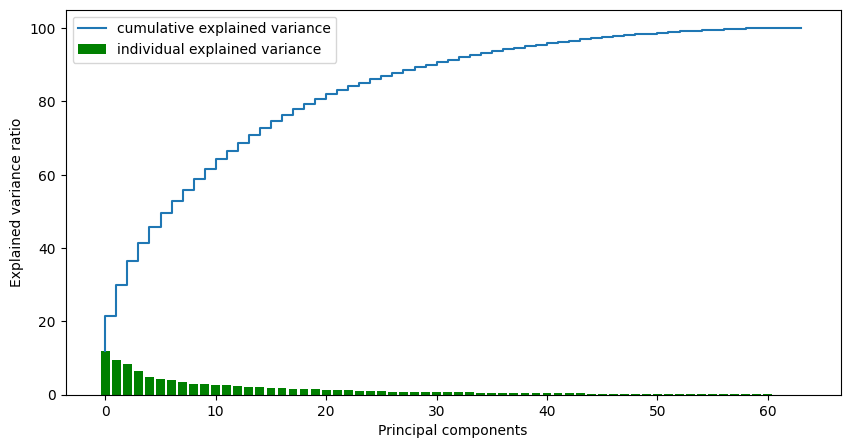

In [ ]:
# Step 5 : Create a Skree Plot between the number of components and Explained variance ratio
# Skree plot = Bar plot + Step plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var)), cum_var,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [ ]:
# from the above plot the n_component 20 to 30 will give information of 80 to 90 % thus take any values between that
# # let's take 25

In [ ]:
# Let's perform PCA for Reducing the Dimention
from sklearn.decomposition import PCA

In [ ]:
pca_model=PCA(n_components=25)
# pca_model=PCA(n_components=0.80)  other method to give n_component


In [ ]:
pca_X=pca_model.fit_transform(Scaled_X)

In [ ]:
pca_X=pd.DataFrame(pca_X)
pca_X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.914214,-0.954502,-3.946035,-2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994,0.558703,0.508826,-0.758896,-0.464500
1,-0.588980,0.924636,3.924755,1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818,-0.242434,-0.478472,0.491158,0.790504
2,-1.302039,-0.317189,3.023333,2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917,0.069262,-1.276142,-0.389437,-0.407580
3,3.020770,-0.868772,-0.801744,2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421,-0.167976,0.573332,-0.532997,-0.084318
4,-4.528949,-1.093480,0.973121,1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644,-0.185698,0.960864,-0.184642,0.563999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104331,0.255024,-3.765861,1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,...,0.161669,0.504438,0.357642,-0.956725,0.816109,0.030250,-0.783514,-0.676671,-0.042743,-0.359572
1793,-2.423234,-1.429611,-3.045245,-2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,...,1.098425,0.301699,-0.311522,-0.307535,0.110083,-0.957759,-0.041950,0.379564,0.082078,0.213136
1794,-1.022596,-0.147911,2.469974,0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,...,1.162071,1.124031,0.669245,-1.612100,0.182303,0.166667,-0.237439,0.041549,0.235181,-0.261485
1795,-1.076055,-0.380906,-2.455487,1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,...,0.158465,1.686638,0.811822,-1.769181,0.774718,-0.135668,-0.433929,1.111662,0.312411,-0.940159


In [ ]:
pca_model=PCA(n_components=0.80)

In [ ]:
pca_X=pca_model.fit_transform(Scaled_X)

In [ ]:
pca_model.n_components_

21